In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from functions import preprocessing, display_silhouettes, display_clusters, display_3D, cluster_color, html_world_map
from IPython.display import display, HTML

# 1/ Dataset upload/overview

In [ ]:
dataset = pd.read_csv("data/kaya_dataset.csv")
# countries selection :
countries = dataset.country.unique()
# year selection :
# years = df.year.unique()
years = [2022]  # only 2022

df = dataset[dataset["year"].isin(years)]
df = df[df["country"].isin(countries)]

# 2/ Preprocessing & Training

In [ ]:
# feature selection
cols = ['country', 'year', 'iso_code']
features_1 = ['co2', 'energy', 'gdp', 'population']
features_2 = ['co2_per_unit_energy', 'energy_per_gdp', 'gdp_per_capita'] 
features_3 = ['co2_per_unit_energy', 'energy_per_gdp', 'gdp_per_capita', 'population']
features = features_2

# preprocessing
X =  preprocessing(df, years, countries, cols, features)

# training
n_clusters = 5
gamma = 0.1
assign_labels = "cluster_qr"
rs = 42 # seed for random functions (center first position)
sc = SpectralClustering(
    n_clusters=n_clusters, affinity='rbf', assign_labels=assign_labels, random_state=rs
    )
cluster_labels = sc.fit_predict(X)


# 3/ Results

KPI & Silhouettes

γ = 0.1
cluster: 5 --> tailles : [ 3  6 53 42 60] | silh_avg = 0.301
0  >  Congo, Lesotho, Mongolia
1  >  Bahrain, Iceland, North Korea, Trinidad and Tobago, Turkmenistan, Venezuela
2  >  Albania, Argentina, Armenia, Australia, Austria, Belgium, Brazil, Canada, Chile, Colombia, Costa Rica, Croatia, Cyprus, Denmark, Finland, France, Georgia, Germany, Greece, Hong Kong, Hungary, Ireland, Israel, Italy, Japan, Latvia, Lithuania, Luxembourg, Malta, Mauritius, Montenegro, Netherlands, New Zealand, Norway, Panama, Paraguay, Portugal, Qatar, Romania, Seychelles, Singapore, Slovakia, Slovenia, South Korea, Spain, Sweden, Switzerland, Taiwan, Turkey, United Arab Emirates, United Kingdom, United States, Uruguay
3  >  Afghanistan, Angola, Bangladesh, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Cote d'Ivoire, Democratic Republic of Congo, Djibouti, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Liberia, Madagascar, Malawi, Mali, Myanmar, N

,n_countries,co2,energy,gdp,population,avg_co2_energy,avg_energy_gdp,avg_gdp_capita,silh_mean,%co2,%energy,%gdp,%population
cluster,,,,,,,,,,,,,
0,3,51.722,7.025356e+10,7.325020e+10,1.170723e+07,0.656667,0.910667,6413.375082,0.519361,0.14,0.04,0.06,0.15
1,6,345.694,1.784600e+12,3.999765e+11,6.518181e+07,0.186333,4.410000,20974.446083,0.411955,0.95,1.06,0.31,0.82
2,53,12390.293,7.096879e+13,6.038593e+13,1.566766e+09,0.162075,1.063811,38257.459240,0.358982,33.97,42.32,46.35,19.81
3,42,905.279,3.897771e+12,6.972913e+12,1.744568e+09,0.248381,0.577357,3178.352134,0.407821,2.48,2.32,5.35,22.05
4,60,22784.722,9.097490e+13,6.244787e+13,4.522342e+09,0.231683,1.366950,13899.184700,0.152246,62.46,54.25,47.93,57.17


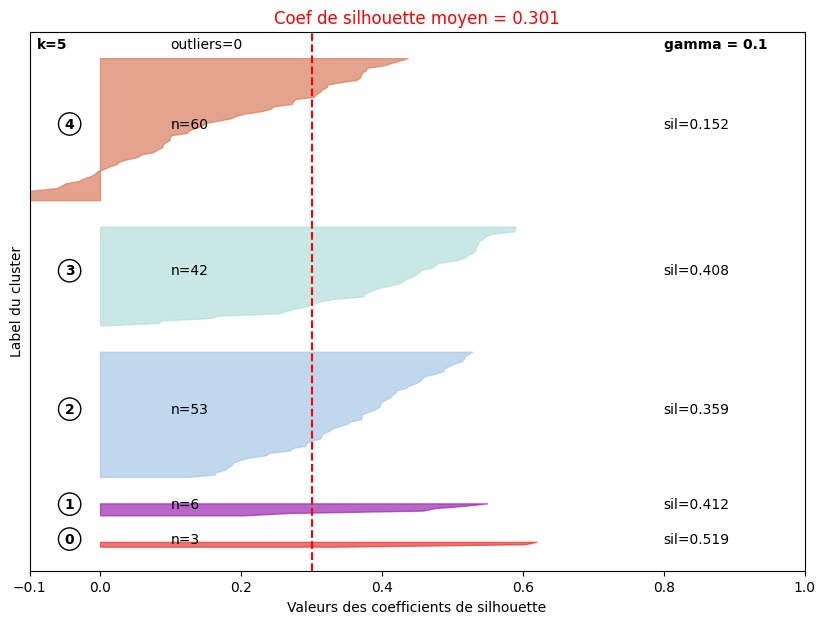

In [17]:
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_sample_values = silhouette_samples(X, cluster_labels)
df["cluster"] = cluster_labels
df = cluster_color(df)
print(f"γ = {gamma}")
print(f"cluster: {n_clusters} --> tailles : {np.bincount(cluster_labels)} | silh_avg = {silhouette_avg:.3f}")

cluster_stats = df.groupby("cluster").agg(
    n_countries=("country", "count"),
    co2=("co2", "sum"),
    energy=("energy", "sum"),
    gdp=("gdp", "sum"),
    population=("population", "sum"),
    avg_co2_energy=("co2_per_unit_energy", "mean"),
    avg_energy_gdp=("energy_per_gdp", "mean"),
    avg_gdp_capita=("gdp_per_capita", "mean"),           
)
cluster_stats["silh_mean"] = [ np.mean(silhouette_sample_values[cluster_labels == i]) for i in range(n_clusters)]
        
for feat in ["co2", "energy", "gdp", "population"]:
    cluster_stats[f"%{feat}"] =  (cluster_stats[feat] / cluster_stats[feat].sum() * 100).round(2)
        
country_list = [ ", ".join(list(df[df["cluster"]==k]["country"])) for k in range(n_clusters) ]
# cluster_stats["country_list"] = country_list
for k, cl in enumerate(country_list):
    print(k, " > ", cl)
        
print(df[df["country"]=="Qatar"])   
# print(cluster_stats)
display(HTML(cluster_stats.to_html().replace(
'<table>', '<table style="border-collapse:collapse; text-align:left;">')))

fig1 = display_silhouettes(X, n_clusters, cluster_labels, gamma=gamma)

### 2D and 3D charts

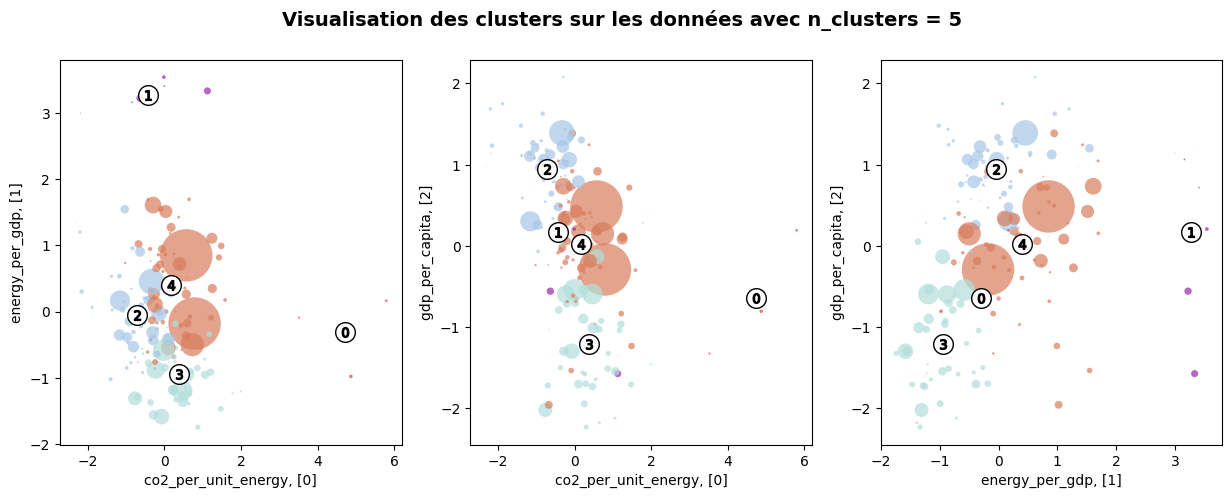

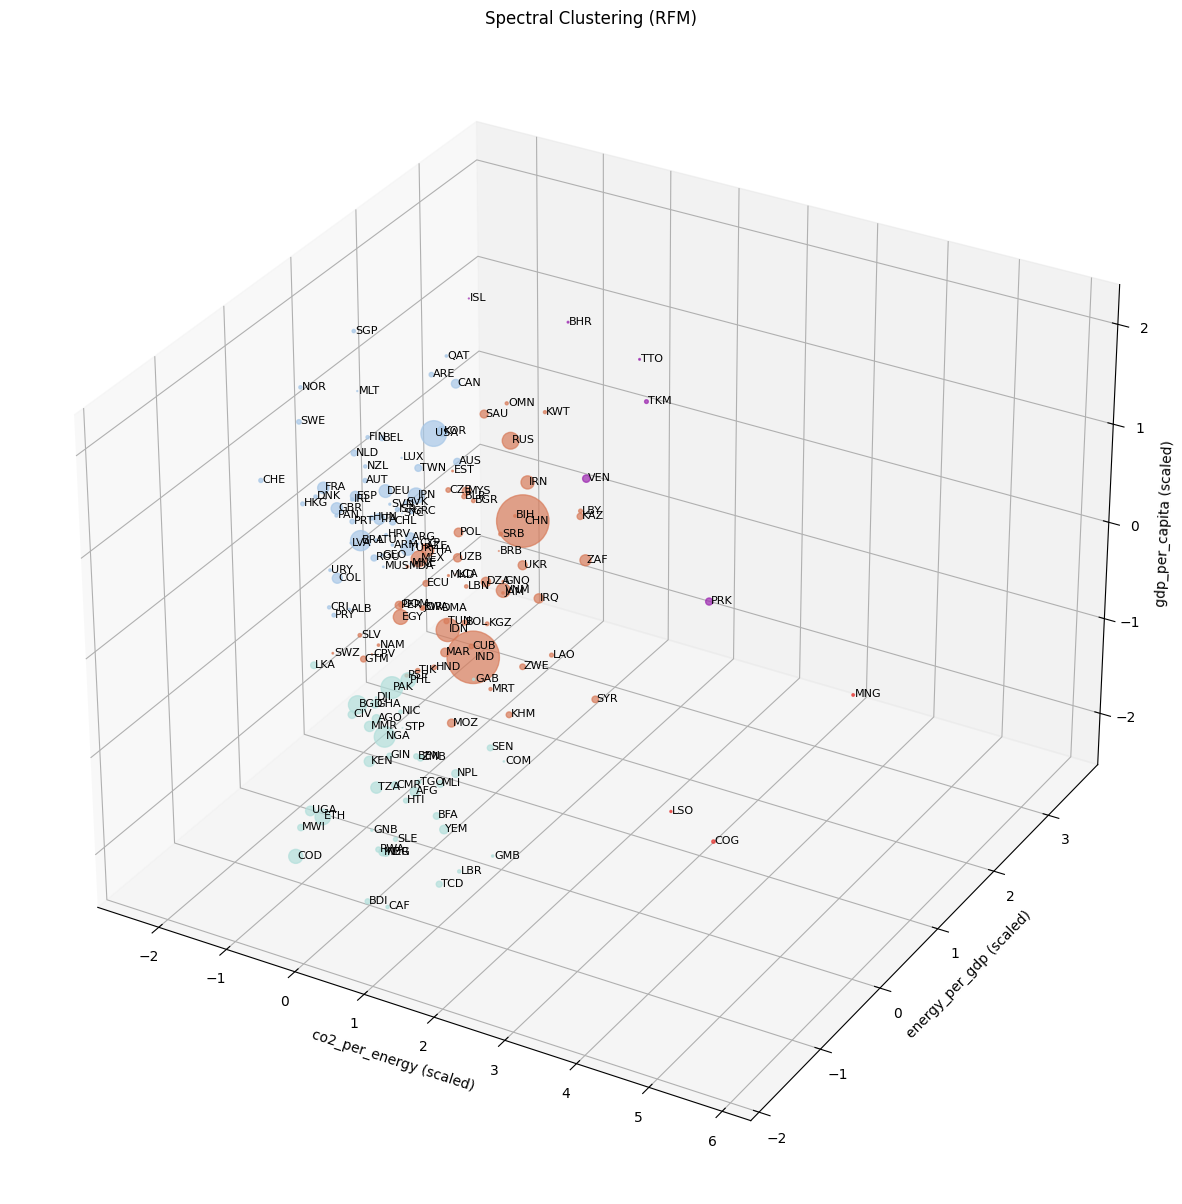

In [18]:
centers = np.array([X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
fig2 = display_clusters(X, n_clusters, features, centers, cluster_labels, df["population"])
fig3 = display_3D(X,cluster_labels, df["population"], df["iso_code"])



### Worldmap

- Visualiser la carte en ouvrant dans un navigateur le fichier :
    ```bash
        world_map.html
    ```


In [19]:
html_world_map(df, features)

Error codes:  57
ABW, AIA, ASM, ATG, BES, BHS, BLZ, BMU, BRN, BTN, CUW, CYM, ERI, ESH, FJI, FLK, FR-, FRO, FSM, GLP, GRD, GRL, GUF, GUM, GUY, ICx, KNA, MAF, MDV, MHL, MNP, MSR, MTQ, MYT, NCL, NRU, PLW, PNG, PRI, PYF, REU, SDN, SLB, SOM, SSD, SUR, SXM, TCA, TLS, TON, TUV, VCT, VGB, VIR, VUT, WSM, XKx


### Selected countries study

In [20]:
# display(HTML(cluster_stats.to_html().replace(
# '<table>', '<table style="border-collapse:collapse; text-align:left;">')))
cluster_stats.to_csv("results/clusters_stats.csv")



In [30]:

selected_countries = ['FRA', 'GER', 'USA', 'CHN', '' 'QAT','BHR', 'BRA', 'RUS', 'IND', 'BGD', 'COD', 'ETH', 'NGA', 'PAK', 'PHL']


dfa = df.copy()
dfa[dfa["iso_code"].isin(selected_countries)].drop(columns=["year", "iso_code"]).to_csv("results/selected_countries.csv")

In [22]:
selected_clusters = [0, 1]
dfa[dfa["cluster"].isin(selected_clusters)].drop(columns=["year", "iso_code"]).to_csv("results/outliers_countries.csv")

In [29]:
selected_clusters = [3]
dfb = dfa[dfa["cluster"].isin(selected_clusters)].drop(columns=["year"])
dfb[dfb["population"]>100000000]

,country,iso_code,co2,energy,gdp,population,co2_per_unit_energy,energy_per_gdp,gdp_per_capita,cluster,cluster_color
524,Bangladesh,BGD,102.147,5.122430e+11,8.581439e+11,169384891.0,0.199,0.597,5066.236439,3,#B2DFDB
1871,Democratic Republic of Congo,COD,5.892,3.718665e+10,9.131499e+10,102396974.0,0.158,0.407,891.774287,3,#B2DFDB
2382,Ethiopia,ETH,16.960,8.049866e+10,2.699772e+11,125384285.0,0.211,0.298,2153.198267,3,#B2DFDB
5148,Nigeria,NGA,131.441,5.174977e+11,1.134449e+12,223150906.0,0.254,0.456,5083.773132,3,#B2DFDB
5387,Pakistan,PAK,211.970,9.788384e+11,1.318835e+12,243700667.0,0.216,0.742,5411.700286,3,#B2DFDB
5615,Philippines,PHL,150.963,5.711589e+11,1.014811e+12,113964343.0,0.264,0.563,8904.636286,3,#B2DFDB


In [23]:
def test_dataset(dataset):
    cty_list = ["Brazil", "Russia", "India", ]
    # cty_list = ["Somalia", "Sudan", "Greenland", "Eritrea", "Guyana", "Suriname", "South Sudan", "test", "Papua New Guinea", "Solomon Islands", "Fiji", "Tuvalu"]
    for cty in cty_list:
        try:
            print(f"{dataset[dataset["country"].str.contains(cty)]["iso_code"].unique()[0]}: {cty}")
        except IndexError:
            print(f"! MISSING ! {cty}")

test_dataset(df)

BRA: Brazil
RUS: Russia
IND: India
